Reads in and plots Peter Bird's Plate boundary data set from a GeoJSON format file
Data comes from: https://github.com/fraxen/tectonicplates

In [13]:
import numpy as np
import pygmt
from matplotlib.pyplot import get_cmap
import geopandas as gpd

In [14]:
# These are not used here but are useful to have defined for many applications
plates = {
    "AF": "Africa",
    "AM": "Amur",
    "AN": "Antarctica",
    "AP": "Altiplano",
    "AR": "Arabia",
    "AS": "Aegean Sea",
    "AT": "Anatolia",
    "AU": "Australia",
    "BH": "Birds Head",
    "BR": "Balmoral Reef",
    "BS": "Banda Sea",
    "BU": "Burma",
    "CA": "Caribbean",
    "CL": "Caroline",
    "CO": "Cocos",
    "CR": "Conway Reef",
    "EA": "Easter",
    "EU": "Eurasia",
    "FT": "Futuna",
    "GP": "Galapagos",
    "IN": "India",
    "JF": "Juan de Fuca",
    "JZ": "Juan Fernandez",
    "KE": "Kermadec",
    "MA": "Mariana",
    "MN": "Manus",
    "MO": "Maoke",
    "MS": "Molucca Sea",
    "NA": "North America",
    "NB": "North Bismarck",
    "ND": "North Andes",
    "NH": "New Hebrides",
    "NI": "Niuafo ou",
    "NZ": "Nazca",
    "OK": "Okhotsk",
    "ON": "Okinawa",
    "PA": "Pacific",
    "PM": "Panama",
    "PS": "Philippine Sea",
    "RI": "Rivera",
    "SA": "South America",
    "SB": "South Bismarck",
    "SC": "Scotia",
    "SL": "Shetland",
    "SO": "Somalia",
    "SS": "Solomon Sea",
    "SU": "Sunda",
    "SW": "Sandwich",
    "TI": "Timor",
    "TO": "Tonga",
    "WL": "Woodlark",
    "YA": "Yangtze",
}

In [15]:
gdf = gpd.read_file("https://raw.githubusercontent.com/fraxen/tectonicplates/refs/heads/master/GeoJSON/PB2002_boundaries.json")

display(gdf)

# \ => under plate B
# / => under plate A

,LAYER,Name,Source,PlateA,PlateB,Type,geometry
0,plate boundary,AF-AN,Mueller et al. [1987],AF,AN,,"LINESTRING (-0.4379 -54.8518, -0.03883 -54.677..."
1,plate boundary,AF-AN,"by Peter Bird, October 2001",AF,AN,,"LINESTRING (7.77235 -54.396, 8.28834 -54.0326,..."
2,plate boundary,AN-AF,Lemaux et al. [2002],AN,AF,,"LINESTRING (32.1258 -46.9998, 31.8654 -47.2011..."
3,plate boundary,SO-AN,Lemaux et al. [2002],SO,AN,,"LINESTRING (32.1258 -46.9998, 33.1739 -47.2644..."
4,plate boundary,SO-AN,Mueller et al. [1987],SO,AN,,"LINESTRING (38.0827 -44.6188, 38.1937 -44.401,..."
...,...,...,...,...,...,...,...
236,plate boundary,CA\ND,Taboada et al. [1997],CA,ND,subduction,"LINESTRING (-76.684 8.7313, -76.7013 9.01654, ..."
237,plate boundary,CA\ND,Perez et al. [1997],CA,ND,subduction,"LINESTRING (-70.6594 13.3101, -70.4957 13.1623..."
238,plate boundary,ND-SA,Collot et al. [2002],ND,SA,,"LINESTRING (-81.5989 -3.24451, -81.3022 -3.267..."
239,plate boundary,ND-SA,Audemard and Audemard [2002],ND,SA,,"LINESTRING (-78.0055 0.14758, -77.707 0.58556,..."


In [16]:
# Get an earth topography to use as base-map
# grid = pygmt.datasets.load_earth_relief(resolution="10m",registration="gridline")
pygmt.config(FONT='Times-Roman')
pygmt.config(FONT_LABEL='Times-Roman,12p')

In [17]:
# Loop through each features in the feature collection
subduction_zones = gdf[gdf['Type'] == 'subduction']


In [18]:
display(subduction_zones)

,LAYER,Name,Source,PlateA,PlateB,Type,geometry
9,plate boundary,EU\AF,"by Peter Bird, 2002.03",EU,AF,subduction,"LINESTRING (10.3732 38.685, 10.6091 38.8209, 1..."
11,plate boundary,EU/AF,"by Peter Bird, 2002.03",EU,AF,subduction,"LINESTRING (15.3751 37.3401, 15.8319 37.2743, ..."
26,plate boundary,AN\SA,"by Peter Bird, 1999",AN,SA,subduction,"LINESTRING (-76.4833 -52.0684, -76.6257 -51.37..."
28,plate boundary,SU/AU,Mueller et al. [1987],SU,AU,subduction,"LINESTRING (104.576 -8.16657, 104.981 -8.5688,..."
32,plate boundary,AU\PA,Mueller et al. [1987],AU,PA,subduction,"LINESTRING (166.951 -44.9871, 167.1 -44.8262, ..."
...,...,...,...,...,...,...,...
224,plate boundary,AT/AF,"Peter Bird, June 2002",AT,AF,subduction,"LINESTRING (29.7309 35.4273, 30.2208 35.1543, ..."
233,plate boundary,CO\PM,Kellogg and Vega [1995],CO,PM,subduction,"LINESTRING (-82.8748 7.36639, -83.0742 7.59169..."
234,plate boundary,ND/NZ,Westbrook et al. [1995],ND,NZ,subduction,"LINESTRING (-78.6463 7.33731, -78.7148 7.23227..."
236,plate boundary,CA\ND,Taboada et al. [1997],CA,ND,subduction,"LINESTRING (-76.684 8.7313, -76.7013 9.01654, ..."


In [19]:
# todo: need to add a column to the geopandas dataframe to store which way the subduction triangles should point as front_side (left or right)

# in Name col:
# \ => under plate B
# / => under plate A

# def function to calculate direction of subduction (left or right)
calc_subduction_direction = lambda x: "l" if "/" in x else "r"

# apply function to the subduction zones
subduction_zones = subduction_zones.copy()
subduction_zones["direction"] = subduction_zones["Name"].apply(calc_subduction_direction)

subduction_zones

,LAYER,Name,Source,PlateA,PlateB,Type,geometry,direction
9,plate boundary,EU\AF,"by Peter Bird, 2002.03",EU,AF,subduction,"LINESTRING (10.3732 38.685, 10.6091 38.8209, 1...",r
11,plate boundary,EU/AF,"by Peter Bird, 2002.03",EU,AF,subduction,"LINESTRING (15.3751 37.3401, 15.8319 37.2743, ...",l
26,plate boundary,AN\SA,"by Peter Bird, 1999",AN,SA,subduction,"LINESTRING (-76.4833 -52.0684, -76.6257 -51.37...",r
28,plate boundary,SU/AU,Mueller et al. [1987],SU,AU,subduction,"LINESTRING (104.576 -8.16657, 104.981 -8.5688,...",l
32,plate boundary,AU\PA,Mueller et al. [1987],AU,PA,subduction,"LINESTRING (166.951 -44.9871, 167.1 -44.8262, ...",r
...,...,...,...,...,...,...,...,...
224,plate boundary,AT/AF,"Peter Bird, June 2002",AT,AF,subduction,"LINESTRING (29.7309 35.4273, 30.2208 35.1543, ...",l
233,plate boundary,CO\PM,Kellogg and Vega [1995],CO,PM,subduction,"LINESTRING (-82.8748 7.36639, -83.0742 7.59169...",r
234,plate boundary,ND/NZ,Westbrook et al. [1995],ND,NZ,subduction,"LINESTRING (-78.6463 7.33731, -78.7148 7.23227...",l
236,plate boundary,CA\ND,Taboada et al. [1997],CA,ND,subduction,"LINESTRING (-76.684 8.7313, -76.7013 9.01654, ...",r


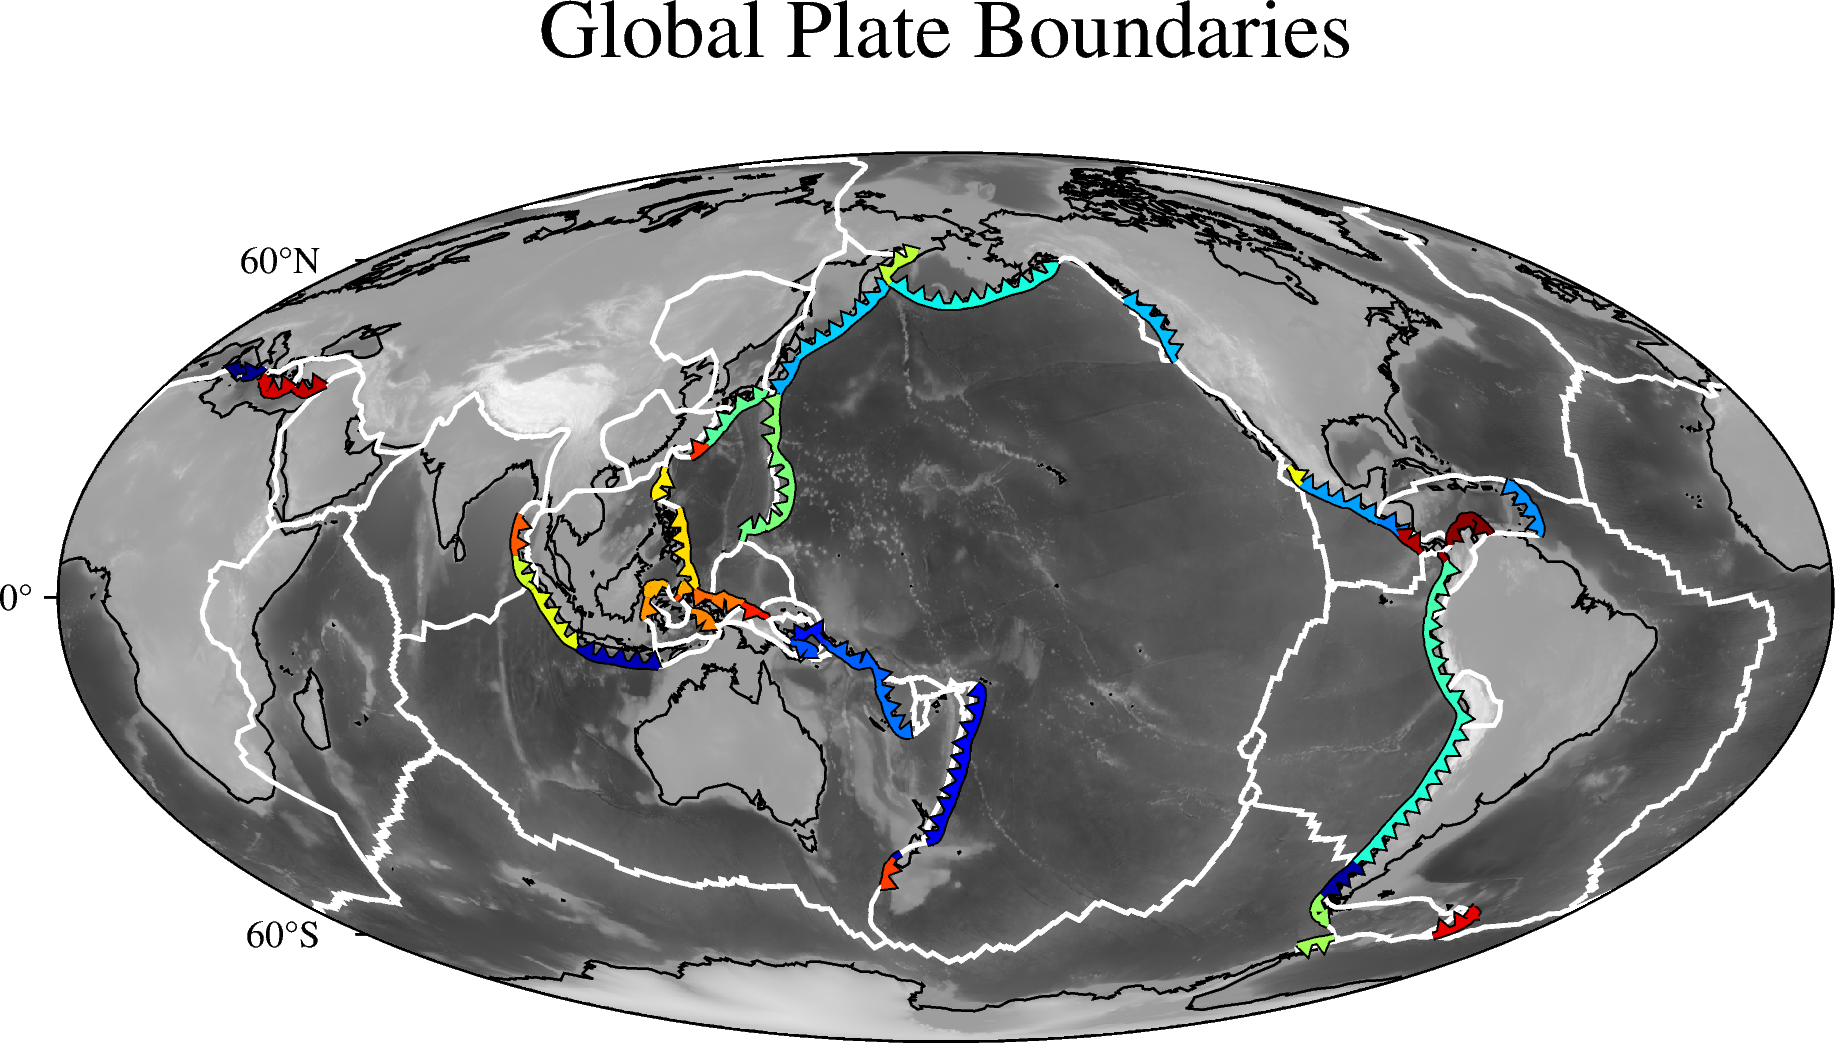

In [63]:
# Create an iterator for the colors
color = iter(get_cmap('jet')(np.linspace(0, 1, len(subduction_zones))))

# Basic global map in gmt
fig = pygmt.Figure()
fig.basemap(region="g", projection="W15c", frame=["a", "+tGlobal Plate Boundaries"])
fig.grdimage(grid="@earth_relief_10m", cmap="gray")
fig.coast(shorelines="1/0.5p,black")

# Now add lines for plate boundary features.
# Colors for subduction zones, white for everything else.
# Plot subduction zones first

# Plot other plate boundary features
for i, row in gdf.iterrows():
    if row["Type"] != "subduction":
        fig.plot(x=row["geometry"].xy[0], y=row["geometry"].xy[1], pen="1p,white")

for i, row in subduction_zones.iterrows():
    c = next(color)
    line_color = f"{int(255*c[0])}/{int(255*c[1])}/{int(255*c[2])}"

    # outline
    outline_color = "black"
    fig.plot(
        x=row["geometry"].xy[0],
        y=row["geometry"].xy[1],
        pen=f"2p,{outline_color}",
        style=f"f0.15c/0.16c+{row.direction}+t+o0.1c+p",
        fill=outline_color,
    )

    fig.plot(
        x=row["geometry"].xy[0],
        y=row["geometry"].xy[1],
        pen=f"1p,{line_color}",
        style=f"f0.15c/0.12c+{row.direction}+t+o0.1c+p",
        fill=line_color,
    )

fig.show()